<a href="https://colab.research.google.com/github/ersaozdemir/GMKA_Esra_Ozdemir/blob/main/odev_son_hal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
# plotly nin iki tane versiyonu varplotly expres ayrıntıya girmeden hızlı grafikler sunar. plotly go ayrıntılı ve dinamik grafikler oluşturur
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs


In [ ]:
import yfinance as yf

aselsan = yf.Ticker("ASELS.IS")

# Tarihe göre Aselsan hisse değerlerini almak için
aselsan_veri = aselsan.history(start="2022-01-01", end="2022-12-31")
aselsan_veri
aselsan_veri = aselsan_veri[["Open","High","Low","Close","Volume"]]
del aselsan_veri["Volume"]
del aselsan_veri["High"]
del aselsan_veri["Low"]
aselsan_veri

,Open,Close
Date,,
2022-01-03 00:00:00+03:00,20.877112,21.693090
2022-01-04 00:00:00+03:00,21.912012,22.389658
2022-01-05 00:00:00+03:00,22.409560,22.907108
2022-01-06 00:00:00+03:00,22.648383,23.145931
2022-01-07 00:00:00+03:00,23.344950,23.344950
...,...,...
2022-12-26 00:00:00+03:00,58.799999,59.200001
2022-12-27 00:00:00+03:00,59.250000,57.950001
2022-12-28 00:00:00+03:00,58.000000,58.400002


In [ ]:
aselsan_veri["Normalizasyon"] = aselsan_veri['Close']/aselsan_veri.iloc[0,1]


In [ ]:
aselsan_veri.dropna()
aselsan_veri["degisim"] = aselsan_veri['Close'].diff(1)


In [ ]:
aselsan_veri['degisimYonu'] = aselsan_veri['degisim'].map(lambda x:'düşen gün' if x < 0 else 'yükselen gün')
aselsan_veri

,Open,Close,Normalizasyon,degisim,degisimYonu
Date,,,,,
2022-01-03 00:00:00+03:00,20.877112,21.693090,1.000000,NaN,yükselen gün
2022-01-04 00:00:00+03:00,21.912012,22.389658,1.032110,0.696568,yükselen gün
2022-01-05 00:00:00+03:00,22.409560,22.907108,1.055963,0.517450,yükselen gün
2022-01-06 00:00:00+03:00,22.648383,23.145931,1.066973,0.238823,yükselen gün
2022-01-07 00:00:00+03:00,23.344950,23.344950,1.076147,0.199018,yükselen gün
...,...,...,...,...,...
2022-12-26 00:00:00+03:00,58.799999,59.200001,2.728980,1.200001,yükselen gün
2022-12-27 00:00:00+03:00,59.250000,57.950001,2.671358,-1.250000,düşen gün
2022-12-28 00:00:00+03:00,58.000000,58.400002,2.692102,0.450001,yükselen gün


In [ ]:
aselsan_veri["ay_yıl"] = aselsan_veri.index.strftime("%Y-%m")  #küçük y ile yazarsan 2022 değil 22 gelir
aselsan_veri
aselsan_veri_as= aselsan_veri.pivot_table(values = ["Open","Close", "Normalizasyon","degisim"],index ="ay_yıl", aggfunc ="last")
aselsan_veri_as
aselsan_veri_as["değisim"] = aselsan_veri_as["Close"].diff(1)
aselsan_veri_as["d_yön"]= aselsan_veri_as["değisim"].map(lambda x:"düşen gün" if x<0 else "yükselen gün")
aselsan_veri_as["değisim%"] =(aselsan_veri_as["değisim"]/aselsan_veri_as["Close"].shift(1)) #yüzü sildim çünkü alt grafikte değerler büyük geldi
aselsan_veri_as

,Close,Normalizasyon,Open,degisim,değisim,d_yön,değisim%
ay_yıl,,,,,,,
2022-01,21.494072,0.990826,22.031423,-0.318430,NaN,yükselen gün,NaN
2022-02,22.130932,1.020183,20.160642,1.691662,0.636860,yükselen gün,0.029630
2022-03,24.021614,1.107339,24.379849,-0.238823,1.890682,yükselen gün,0.085432
2022-04,24.379850,1.123853,24.897301,-0.258724,0.358236,yükselen gün,0.014913
2022-05,24.340046,1.122018,24.121126,0.278627,-0.039804,düşen gün,-0.001633
2022-06,22.747892,1.048624,22.509070,0.179117,-1.592154,düşen gün,-0.065413
2022-07,22.091129,1.018349,22.051325,0.099510,-0.656763,düşen gün,-0.028871
2022-08,25.932199,1.195413,26.628767,-0.398037,3.841070,yükselen gün,0.173874
2022-09,29.156309,1.344037,29.852877,-0.597057,3.224110,yükselen gün,0.124328


# **ASELSAN VERİLERİ BİTTİ**

In [ ]:
asuzu = yf.Ticker("ASUZU.IS")

asuzu_veri = asuzu.history(start="2022-01-01", end="2022-12-31")
asuzu_veri
asuzu_veri = asuzu_veri[["Open","High","Low","Close","Volume"]]
asuzu_veri
del asuzu_veri["Volume"]
del asuzu_veri["High"]
del asuzu_veri["Low"]
asuzu_veri

,Open,Close
Date,,
2022-01-03 00:00:00+03:00,35.380737,34.762821
2022-01-04 00:00:00+03:00,34.962149,34.882416
2022-01-05 00:00:00+03:00,35.261140,37.314217
2022-01-06 00:00:00+03:00,37.174689,36.576706
2022-01-07 00:00:00+03:00,36.576704,35.978718
...,...,...
2022-12-26 00:00:00+03:00,244.500000,238.100006
2022-12-27 00:00:00+03:00,239.199997,244.000000
2022-12-28 00:00:00+03:00,244.000000,235.300003


In [ ]:
asuzu_veri["Normalizasyon"] = asuzu_veri['Close']/asuzu_veri.iloc[0,1]

In [ ]:
asuzu_veri["degisim"] = asuzu_veri['Close'].diff(1)

In [ ]:
asuzu_veri['degisimYonu'] = asuzu_veri['degisim'].map(lambda x:'düşen gün' if x < 0 else 'yükselen gün')
asuzu_veri

,Open,Close,Normalizasyon,degisim,degisimYonu
Date,,,,,
2022-01-03 00:00:00+03:00,35.380737,34.762821,1.000000,NaN,yükselen gün
2022-01-04 00:00:00+03:00,34.962149,34.882416,1.003440,0.119595,yükselen gün
2022-01-05 00:00:00+03:00,35.261140,37.314217,1.073394,2.431801,yükselen gün
2022-01-06 00:00:00+03:00,37.174689,36.576706,1.052179,-0.737511,düşen gün
2022-01-07 00:00:00+03:00,36.576704,35.978718,1.034977,-0.597988,düşen gün
...,...,...,...,...,...
2022-12-26 00:00:00+03:00,244.500000,238.100006,6.849272,-5.899994,düşen gün
2022-12-27 00:00:00+03:00,239.199997,244.000000,7.018993,5.899994,yükselen gün
2022-12-28 00:00:00+03:00,244.000000,235.300003,6.768726,-8.699997,düşen gün


In [ ]:
asuzu_veri["ay_yıl"] = asuzu_veri.index.strftime("%Y-%m")  #küçük y ile yazarsan 2022 değil 22 gelir
asuzu_veri
asuzu_veri_as= asuzu_veri.pivot_table(values = ["Open","Close", "Normalizasyon","degisim"],index ="ay_yıl", aggfunc ="last")
asuzu_veri_as
asuzu_veri_as["değisim"] = asuzu_veri_as["Close"].diff(1)
asuzu_veri_as["d_yön"]= asuzu_veri_as["değisim"].map(lambda x:"düşen gün" if x<0 else "yükselen gün")
asuzu_veri_as["değisim%"] =(asuzu_veri_as["değisim"]/asuzu_veri_as["Close"].shift(1)) #yüzü sildim çünkü alt grafikte değerler büyük geldi
asuzu_veri_as

,Close,Normalizasyon,Open,degisim,değisim,d_yön,değisim%
ay_yıl,,,,,,,
2022-01,46.144451,1.327408,45.287340,2.172676,NaN,yükselen gün,NaN
2022-02,43.911980,1.263188,42.855539,-0.378719,-2.232471,düşen gün,-0.048380
2022-03,74.548706,2.144495,67.821383,6.777153,30.636726,yükselen gün,0.697685
2022-04,86.458557,2.487098,84.664601,1.195961,11.909851,yükselen gün,0.159759
2022-05,105.942879,3.047592,108.135485,-1.893616,19.484322,yükselen gün,0.225360
2022-06,133.600006,3.843187,136.000000,-2.399994,27.657127,yükselen gün,0.261057
2022-07,265.000000,7.623087,250.000000,19.500000,131.399994,yükselen gün,0.983533
2022-08,273.000000,7.853218,276.899994,-3.899994,8.000000,yükselen gün,0.030189
2022-09,202.500000,5.825189,188.100006,15.199997,-70.500000,düşen gün,-0.258242


# ***ASUZU BİTTİ***

In [ ]:
cemts = yf.Ticker("CEMTS.IS")
cemts_veri = cemts.history(start="2022-01-01", end="2022-12-31")
cemts_veri
cemts_veri = cemts_veri[["Open","High","Low","Close","Volume"]]
del cemts_veri["Volume"]
del cemts_veri["High"]
del cemts_veri["Low"]

In [ ]:
cemts_veri["Normalizasyon"] = cemts_veri['Close']/cemts_veri.iloc[0,1]


In [ ]:
cemts_veri.dropna()
cemts_veri["degisim"] = cemts_veri['Close'].diff(1)


In [ ]:
cemts_veri['degisimYonu'] = cemts_veri['degisim'].map(lambda x:'düşen gün' if x < 0 else 'yükselen gün')
cemts_veri

,Open,Close,Normalizasyon,degisim,degisimYonu
Date,,,,,
2022-01-03 00:00:00+03:00,18.511839,18.591076,1.000000,NaN,yükselen gün
2022-01-04 00:00:00+03:00,18.620788,18.422695,0.990943,-0.168381,düşen gün
2022-01-05 00:00:00+03:00,18.422695,18.501932,0.995205,0.079237,yükselen gün
2022-01-06 00:00:00+03:00,18.284029,18.343458,0.986681,-0.158474,düşen gün
2022-01-07 00:00:00+03:00,18.383075,17.996794,0.968034,-0.346664,düşen gün
...,...,...,...,...,...
2022-12-26 00:00:00+03:00,60.299999,63.900002,3.437133,3.850002,yükselen gün
2022-12-27 00:00:00+03:00,64.949997,63.900002,3.437133,0.000000,yükselen gün
2022-12-28 00:00:00+03:00,64.199997,60.650002,3.262318,-3.250000,düşen gün


In [ ]:
cemts_veri["ay_yıl"] = cemts_veri.index.strftime("%Y-%m")  #küçük y ile yazarsan 2022 değil 22 gelir
cemts_veri
cemts_veri_as= cemts_veri.pivot_table(values = ["Open","Close", "Normalizasyon","degisim"],index ="ay_yıl", aggfunc ="last")
cemts_veri_as
cemts_veri_as["değisim"] = cemts_veri_as["Close"].diff(1)
cemts_veri_as["d_yön"]= cemts_veri_as["değisim"].map(lambda x:"düşen gün" if x<0 else "yükselen gün")
cemts_veri_as["değisim%"] =(cemts_veri_as["değisim"]/cemts_veri_as["Close"].shift(1)) #yüzü sildim çünkü alt grafikte değerler büyük geldi
cemts_veri_as

,Close,Normalizasyon,Open,degisim,değisim,d_yön,değisim%
ay_yıl,,,,,,,
2022-01,17.075659,0.918487,17.352990,-0.188190,NaN,yükselen gün,NaN
2022-02,18.234507,0.980820,18.313744,-0.307045,1.158848,yükselen gün,0.067865
2022-03,21.037529,1.131593,21.691237,-0.475424,2.803022,yükselen gün,0.153721
2022-04,25.712536,1.383058,25.712536,2.337503,4.675007,yükselen gün,0.222222
2022-05,26.980000,1.451234,27.680000,-0.600000,1.267464,yükselen gün,0.049294
2022-06,24.920000,1.340428,25.080000,-0.480000,-2.059999,düşen gün,-0.076353
2022-07,28.860001,1.552358,29.620001,-0.760000,3.940001,yükselen gün,0.158106
2022-08,31.900000,1.715877,32.619999,-0.719999,3.039999,yükselen gün,0.105336
2022-09,32.560001,1.751378,31.520000,1.360001,0.660002,yükselen gün,0.020690


# ***CEMTS BİTTİ***

In [ ]:
egeen = yf.Ticker("EGEEN.IS")
egeen_veri= egeen.history(start="2022-01-01", end="2022-12-31")
egeen_veri
egeen_veri = egeen_veri[["Open","High","Low","Close","Volume"]]
egeen_veri

del egeen_veri["Volume"]
del egeen_veri["High"]
del egeen_veri["Low"]

In [ ]:
egeen_veri["Normalizasyon"] = egeen_veri['Close']/egeen_veri.iloc[0,1]

In [ ]:
egeen_veri.dropna()
egeen_veri["degisim"] = egeen_veri['Close'].diff(1)


In [ ]:
egeen_veri['degisimYonu'] = egeen_veri['degisim'].map(lambda x:'düşen gün' if x < 0 else 'yükselen gün')
egeen_veri

,Open,Close,Normalizasyon,degisim,degisimYonu
Date,,,,,
2022-01-03 00:00:00+03:00,1641.112726,1677.457642,1.000000,NaN,yükselen gün
2022-01-04 00:00:00+03:00,1690.504381,1728.713135,1.030555,51.255493,yükselen gün
2022-01-05 00:00:00+03:00,1733.372980,1664.597168,0.992333,-64.115967,düşen gün
2022-01-06 00:00:00+03:00,1664.597112,1650.991089,0.984222,-13.606079,düşen gün
2022-01-07 00:00:00+03:00,1657.048600,1654.159668,0.986111,3.168579,yükselen gün
...,...,...,...,...,...
2022-12-26 00:00:00+03:00,5784.427707,6039.485840,3.600381,367.932129,yükselen gün
2022-12-27 00:00:00+03:00,6221.171416,6065.884766,3.616118,26.398926,yükselen gün
2022-12-28 00:00:00+03:00,6153.136501,5679.512207,3.385786,-386.372559,düşen gün


In [ ]:
egeen_veri["ay_yıl"] = egeen_veri.index.strftime("%Y-%m")  #küçük y ile yazarsan 2022 değil 22 gelir
egeen_veri
egeen_veri_as= egeen_veri.pivot_table(values = ["Open","Close", "Normalizasyon","degisim"],index ="ay_yıl", aggfunc ="last")
egeen_veri_as
egeen_veri_as["değisim"] = egeen_veri_as["Close"].diff(1)
egeen_veri_as["d_yön"]= egeen_veri_as["değisim"].map(lambda x:"düşen gün" if x<0 else "yükselen gün")
egeen_veri_as["değisim%"] =(egeen_veri_as["değisim"]/egeen_veri_as["Close"].shift(1)) #yüzü sildim çünkü alt grafikte değerler büyük geldi
egeen_veri_as

,Close,Normalizasyon,Open,degisim,değisim,d_yön,değisim%
ay_yıl,,,,,,,
2022-01,1626.388306,0.969556,1628.904560,18.917847,NaN,yükselen gün,NaN
2022-02,1655.650757,0.987000,1668.138520,-17.147339,29.262451,yükselen gün,0.017992
2022-03,1744.781616,1.040135,1652.473671,105.346436,89.130859,yükselen gün,0.053834
2022-04,1757.650757,1.047806,1727.563969,47.071289,12.869141,yükselen gün,0.007376
2022-05,1676.125244,0.999206,1658.655496,23.292969,-81.525513,düşen gün,-0.046383
2022-06,2187.018311,1.303770,2251.559326,-43.480469,510.893066,yükselen gün,0.304806
2022-07,2075.988525,1.237580,2075.017984,17.372559,-111.029785,düşen gün,-0.050768
2022-08,2238.068604,1.334203,2258.741184,-20.478760,162.080078,yükselen gün,0.078074
2022-09,2189.929932,1.305505,2153.922981,40.180420,-48.138672,düşen gün,-0.021509


# ***EGEEN BİTTİ***

In [ ]:
tmsn = yf.Ticker("TMSN.IS")
tmsn_veri = tmsn.history(start="2022-01-01", end="2022-12-31")
tmsn_veri
tmsn_veri = tmsn_veri[["Open","High","Low","Close","Volume"]]
tmsn_veri

del tmsn_veri["Volume"]
del tmsn_veri["High"]
del tmsn_veri["Low"]
tmsn_veri

,Open,Close
Date,,
2022-01-03 00:00:00+03:00,19.150000,19.059999
2022-01-04 00:00:00+03:00,19.150000,19.040001
2022-01-05 00:00:00+03:00,19.070000,18.870001
2022-01-06 00:00:00+03:00,18.799999,18.760000
2022-01-07 00:00:00+03:00,18.840000,18.600000
...,...,...
2022-12-26 00:00:00+03:00,67.949997,67.699997
2022-12-27 00:00:00+03:00,67.699997,65.849998
2022-12-28 00:00:00+03:00,65.849998,64.199997


In [ ]:
tmsn_veri["Normalizasyon"] = tmsn_veri['Close']/tmsn_veri.iloc[0,1]

In [ ]:
tmsn_veri.dropna()
tmsn_veri["degisim"] = tmsn_veri['Close'].diff(1)

In [ ]:
tmsn_veri['degisimYonu'] = tmsn_veri['degisim'].map(lambda x:'düşen gün' if x < 0 else 'yükselen gün')
tmsn_veri

,Open,Close,Normalizasyon,degisim,degisimYonu
Date,,,,,
2022-01-03 00:00:00+03:00,19.150000,19.059999,1.000000,NaN,yükselen gün
2022-01-04 00:00:00+03:00,19.150000,19.040001,0.998951,-0.019999,düşen gün
2022-01-05 00:00:00+03:00,19.070000,18.870001,0.990032,-0.170000,düşen gün
2022-01-06 00:00:00+03:00,18.799999,18.760000,0.984260,-0.110001,düşen gün
2022-01-07 00:00:00+03:00,18.840000,18.600000,0.975866,-0.160000,düşen gün
...,...,...,...,...,...
2022-12-26 00:00:00+03:00,67.949997,67.699997,3.551941,0.000000,yükselen gün
2022-12-27 00:00:00+03:00,67.699997,65.849998,3.454879,-1.849998,düşen gün
2022-12-28 00:00:00+03:00,65.849998,64.199997,3.368311,-1.650002,düşen gün


In [ ]:
tmsn_veri["ay_yıl"] = tmsn_veri.index.strftime("%Y-%m")  #küçük y ile yazarsan 2022 değil 22 gelir
tmsn_veri
tmsn_veri_as= tmsn_veri.pivot_table(values = ["Open","Close", "Normalizasyon","degisim"],index ="ay_yıl", aggfunc ="last")
tmsn_veri_as
tmsn_veri_as["değisim"] = tmsn_veri_as["Close"].diff(1)
tmsn_veri_as["d_yön"]= tmsn_veri_as["değisim"].map(lambda x:"düşen gün" if x<0 else "yükselen gün")
tmsn_veri_as["değisim%"] =(tmsn_veri_as["değisim"]/tmsn_veri_as["Close"].shift(1)) #yüzü sildim çünkü alt grafikte değerler büyük geldi
tmsn_veri_as

,Close,Normalizasyon,Open,degisim,değisim,d_yön,değisim%
ay_yıl,,,,,,,
2022-01,17.850000,0.936516,17.080000,0.820000,NaN,yükselen gün,NaN
2022-02,15.310000,0.803253,15.170000,-0.389999,-2.540000,düşen gün,-0.142297
2022-03,16.650000,0.873557,16.600000,0.080000,1.339999,yükselen gün,0.087524
2022-04,20.180000,1.058762,19.790001,0.400000,3.530001,yükselen gün,0.212012
2022-05,24.799999,1.301154,25.600000,-0.700001,4.619999,yükselen gün,0.228939
2022-06,29.900000,1.568730,31.620001,-1.700001,5.100000,yükselen gün,0.205645
2022-07,48.340000,2.536202,46.799999,2.639999,18.440001,yükselen gün,0.616722
2022-08,70.599998,3.704092,64.199997,6.400002,22.259998,yükselen gün,0.460488
2022-09,65.199997,3.420776,64.449997,0.500000,-5.400002,düşen gün,-0.076487


# ***TÜMOSAN BİTTİ***

In [ ]:
px.bar(aselsan_veri, y ="degisim" ,
       color_discrete_map={'düşen gün' : 'red' , 'yükselen gün': 'green'} , color='degisimYonu')

In [ ]:
px.bar(tmsn_veri, y ="degisim" ,
       color_discrete_map={'düşen gün' : 'red' , 'yükselen gün': 'green'} , color='degisimYonu')

In [ ]:
px.bar(egeen_veri, y ="degisim" ,
       color_discrete_map={'düşen gün' : 'red' , 'yükselen gün': 'green'} , color='degisimYonu')

In [ ]:
px.bar(asuzu_veri, y ="degisim" ,
       color_discrete_map={'düşen gün' : 'red' , 'yükselen gün': 'green'} , color='degisimYonu')

In [ ]:
px.bar(cemts_veri, y ="degisim" ,
       color_discrete_map={'düşen gün' : 'red' , 'yükselen gün': 'green'} , color='degisimYonu')

In [ ]:
aselsan_veri_as = aselsan_veri_as[["degisim"]]
aselsan_veri_as.columns = ['ASELSAN Değişim']
aselsan_veri_as

,ASELSAN Değişim
ay_yıl,
2022-01,-0.318430
2022-02,1.691662
2022-03,-0.238823
2022-04,-0.258724
2022-05,0.278627
2022-06,0.179117
2022-07,0.099510
2022-08,-0.398037
2022-09,-0.597057


In [ ]:
asuzu_veri_as = asuzu_veri_as[["degisim"]]
asuzu_veri_as.columns = ['ASUZU Değişim']
asuzu_veri_as

,ASUZU Değişim
ay_yıl,
2022-01,2.172676
2022-02,-0.378719
2022-03,6.777153
2022-04,1.195961
2022-05,-1.893616
2022-06,-2.399994
2022-07,19.500000
2022-08,-3.899994
2022-09,15.199997


In [ ]:
cemts_veri_as = cemts_veri_as[["degisim"]]
cemts_veri_as.columns = ['CEMTS Değişim']
cemts_veri_as

,CEMTS Değişim
ay_yıl,
2022-01,-0.188190
2022-02,-0.307045
2022-03,-0.475424
2022-04,2.337503
2022-05,-0.600000
2022-06,-0.480000
2022-07,-0.760000
2022-08,-0.719999
2022-09,1.360001


In [ ]:
tmsn_veri_as = tmsn_veri_as[["degisim"]]
tmsn_veri_as.columns = ['TMSN Değişim']
tmsn_veri_as

,TMSN Değişim
ay_yıl,
2022-01,0.820000
2022-02,-0.389999
2022-03,0.080000
2022-04,0.400000
2022-05,-0.700001
2022-06,-1.700001
2022-07,2.639999
2022-08,6.400002
2022-09,0.500000


In [ ]:
egeen_veri_as = egeen_veri_as[["degisim"]]
egeen_veri_as.columns = ['EGEEN Değişim']
egeen_veri_as

,EGEEN Değişim
ay_yıl,
2022-01,18.917847
2022-02,-17.147339
2022-03,105.346436
2022-04,47.071289
2022-05,23.292969
2022-06,-43.480469
2022-07,17.372559
2022-08,-20.478760
2022-09,40.180420


In [ ]:
veri_degisim_birlesim = pd.concat([aselsan_veri_as , asuzu_veri_as , egeen_veri_as , cemts_veri_as, tmsn_veri_as] , axis=1)
veri_degisim_birlesim

,ASELSAN Değişim,ASUZU Değişim,EGEEN Değişim,CEMTS Değişim,TMSN Değişim
ay_yıl,,,,,
2022-01,-0.318430,2.172676,18.917847,-0.188190,0.820000
2022-02,1.691662,-0.378719,-17.147339,-0.307045,-0.389999
2022-03,-0.238823,6.777153,105.346436,-0.475424,0.080000
2022-04,-0.258724,1.195961,47.071289,2.337503,0.400000
2022-05,0.278627,-1.893616,23.292969,-0.600000,-0.700001
2022-06,0.179117,-2.399994,-43.480469,-0.480000,-1.700001
2022-07,0.099510,19.500000,17.372559,-0.760000,2.639999
2022-08,-0.398037,-3.899994,-20.478760,-0.719999,6.400002
2022-09,-0.597057,15.199997,40.180420,1.360001,0.500000


In [ ]:
figure_2 = px.bar(veri_degisim_birlesim)
figure_2.show()

In [ ]:
aselsan_veriN = aselsan_veri[["Normalizasyon"]]
aselsan_veriN.columns = ['ASELSAN Normalizasyon']
aselsan_veriN

,ASELSAN Normalizasyon
Date,
2022-01-03 00:00:00+03:00,1.000000
2022-01-04 00:00:00+03:00,1.032110
2022-01-05 00:00:00+03:00,1.055963
2022-01-06 00:00:00+03:00,1.066973
2022-01-07 00:00:00+03:00,1.076147
...,...
2022-12-26 00:00:00+03:00,2.728980
2022-12-27 00:00:00+03:00,2.671358
2022-12-28 00:00:00+03:00,2.692102


In [ ]:
cemts_veriN = cemts_veri[["Normalizasyon"]]
cemts_veriN.columns = ['CEMTS Normalizasyon']
cemts_veriN

,CEMTS Normalizasyon
Date,
2022-01-03 00:00:00+03:00,1.000000
2022-01-04 00:00:00+03:00,0.990943
2022-01-05 00:00:00+03:00,0.995205
2022-01-06 00:00:00+03:00,0.986681
2022-01-07 00:00:00+03:00,0.968034
...,...
2022-12-26 00:00:00+03:00,3.437133
2022-12-27 00:00:00+03:00,3.437133
2022-12-28 00:00:00+03:00,3.262318


In [ ]:
asuzu_veriN = asuzu_veri[["Normalizasyon"]]
asuzu_veriN.columns = ['ASUZU Normalizasyon']
asuzu_veriN

,ASUZU Normalizasyon
Date,
2022-01-03 00:00:00+03:00,1.000000
2022-01-04 00:00:00+03:00,1.003440
2022-01-05 00:00:00+03:00,1.073394
2022-01-06 00:00:00+03:00,1.052179
2022-01-07 00:00:00+03:00,1.034977
...,...
2022-12-26 00:00:00+03:00,6.849272
2022-12-27 00:00:00+03:00,7.018993
2022-12-28 00:00:00+03:00,6.768726


In [ ]:
egeen_veriN = egeen_veri[["Normalizasyon"]]
egeen_veriN.columns = ['EGEEN Normalizasyon']
egeen_veriN

,EGEEN Normalizasyon
Date,
2022-01-03 00:00:00+03:00,1.000000
2022-01-04 00:00:00+03:00,1.030555
2022-01-05 00:00:00+03:00,0.992333
2022-01-06 00:00:00+03:00,0.984222
2022-01-07 00:00:00+03:00,0.986111
...,...
2022-12-26 00:00:00+03:00,3.600381
2022-12-27 00:00:00+03:00,3.616118
2022-12-28 00:00:00+03:00,3.385786


In [ ]:
tmsn_veriN = tmsn_veri[["Normalizasyon"]]
tmsn_veriN.columns = ['TMSN Normalizasyon']
tmsn_veriN

,TMSN Normalizasyon
Date,
2022-01-03 00:00:00+03:00,1.000000
2022-01-04 00:00:00+03:00,0.998951
2022-01-05 00:00:00+03:00,0.990032
2022-01-06 00:00:00+03:00,0.984260
2022-01-07 00:00:00+03:00,0.975866
...,...
2022-12-26 00:00:00+03:00,3.551941
2022-12-27 00:00:00+03:00,3.454879
2022-12-28 00:00:00+03:00,3.368311


In [ ]:
veri_birlesim = pd.concat([aselsan_veriN,asuzu_veriN,egeen_veriN,tmsn_veriN , cemts_veriN] , axis=1)
veri_birlesim

,ASELSAN Normalizasyon,ASUZU Normalizasyon,EGEEN Normalizasyon,TMSN Normalizasyon,CEMTS Normalizasyon
Date,,,,,
2022-01-03 00:00:00+03:00,1.000000,1.000000,1.000000,1.000000,1.000000
2022-01-04 00:00:00+03:00,1.032110,1.003440,1.030555,0.998951,0.990943
2022-01-05 00:00:00+03:00,1.055963,1.073394,0.992333,0.990032,0.995205
2022-01-06 00:00:00+03:00,1.066973,1.052179,0.984222,0.984260,0.986681
2022-01-07 00:00:00+03:00,1.076147,1.034977,0.986111,0.975866,0.968034
...,...,...,...,...,...
2022-12-26 00:00:00+03:00,2.728980,6.849272,3.600381,3.551941,3.437133
2022-12-27 00:00:00+03:00,2.671358,7.018993,3.616118,3.454879,3.437133
2022-12-28 00:00:00+03:00,2.692102,6.768726,3.385786,3.368311,3.262318


In [ ]:
figure = px.line(veri_birlesim)
figure.show()

In [ ]:
aselsan_veri = aselsan_veri[["degisim"]]
aselsan_veri.columns = ['ASELSAN Degişim']
aselsan_veri

,ASELSAN Degişim
Date,
2022-01-03 00:00:00+03:00,NaN
2022-01-04 00:00:00+03:00,0.696568
2022-01-05 00:00:00+03:00,0.517450
2022-01-06 00:00:00+03:00,0.238823
2022-01-07 00:00:00+03:00,0.199018
...,...
2022-12-26 00:00:00+03:00,1.200001
2022-12-27 00:00:00+03:00,-1.250000
2022-12-28 00:00:00+03:00,0.450001


In [ ]:
asuzu_veri = asuzu_veri[["degisim"]]
asuzu_veri.columns = ['ASUZU Degişim']
asuzu_veri

,ASUZU Degişim
Date,
2022-01-03 00:00:00+03:00,NaN
2022-01-04 00:00:00+03:00,0.119595
2022-01-05 00:00:00+03:00,2.431801
2022-01-06 00:00:00+03:00,-0.737511
2022-01-07 00:00:00+03:00,-0.597988
...,...
2022-12-26 00:00:00+03:00,-5.899994
2022-12-27 00:00:00+03:00,5.899994
2022-12-28 00:00:00+03:00,-8.699997


In [ ]:
cemts_veri = cemts_veri[["degisim"]]
cemts_veri.columns = ['CEMTS Degişim']
cemts_veri

,CEMTS Degişim
Date,
2022-01-03 00:00:00+03:00,NaN
2022-01-04 00:00:00+03:00,-0.168381
2022-01-05 00:00:00+03:00,0.079237
2022-01-06 00:00:00+03:00,-0.158474
2022-01-07 00:00:00+03:00,-0.346664
...,...
2022-12-26 00:00:00+03:00,3.850002
2022-12-27 00:00:00+03:00,0.000000
2022-12-28 00:00:00+03:00,-3.250000


In [ ]:
tmsn_veri = tmsn_veri[["degisim"]]
tmsn_veri.columns = ['TMSN Degişim']
tmsn_veri

,TMSN Degişim
Date,
2022-01-03 00:00:00+03:00,NaN
2022-01-04 00:00:00+03:00,-0.019999
2022-01-05 00:00:00+03:00,-0.170000
2022-01-06 00:00:00+03:00,-0.110001
2022-01-07 00:00:00+03:00,-0.160000
...,...
2022-12-26 00:00:00+03:00,0.000000
2022-12-27 00:00:00+03:00,-1.849998
2022-12-28 00:00:00+03:00,-1.650002


In [ ]:
egeen_veri = egeen_veri[["degisim"]]
egeen_veri.columns = ['EGEEN Degişim']
egeen_veri

,EGEEN Degişim
Date,
2022-01-03 00:00:00+03:00,NaN
2022-01-04 00:00:00+03:00,51.255493
2022-01-05 00:00:00+03:00,-64.115967
2022-01-06 00:00:00+03:00,-13.606079
2022-01-07 00:00:00+03:00,3.168579
...,...
2022-12-26 00:00:00+03:00,367.932129
2022-12-27 00:00:00+03:00,26.398926
2022-12-28 00:00:00+03:00,-386.372559


In [ ]:
degisim_birlesim = pd.concat([aselsan_veri , asuzu_veri , egeen_veri , tmsn_veri, cemts_veri] , axis=1)
degisim_birlesim

,ASELSAN Degişim,ASUZU Degişim,EGEEN Degişim,TMSN Degişim,CEMTS Degişim
Date,,,,,
2022-01-03 00:00:00+03:00,NaN,NaN,NaN,NaN,NaN
2022-01-04 00:00:00+03:00,0.696568,0.119595,51.255493,-0.019999,-0.168381
2022-01-05 00:00:00+03:00,0.517450,2.431801,-64.115967,-0.170000,0.079237
2022-01-06 00:00:00+03:00,0.238823,-0.737511,-13.606079,-0.110001,-0.158474
2022-01-07 00:00:00+03:00,0.199018,-0.597988,3.168579,-0.160000,-0.346664
...,...,...,...,...,...
2022-12-26 00:00:00+03:00,1.200001,-5.899994,367.932129,0.000000,3.850002
2022-12-27 00:00:00+03:00,-1.250000,5.899994,26.398926,-1.849998,0.000000
2022-12-28 00:00:00+03:00,0.450001,-8.699997,-386.372559,-1.650002,-3.250000


In [ ]:
figure_1 = px.bar(degisim_birlesim)
figure_1.show()

# ***HEMEN ÜSTEKİ KOD ÇALIŞACAK  [115 YAZAN] ***

In [ ]:
plt.plot(aselsan_veri['Normalizasyon'], label='ASELSAN')
plt.plot(tmsn_veri["Normalizasyon"], label="TMSN")
plt.show

KeyError: ignored

In [ ]:
px.bar(aselsan_veri, y = "Normalizasyon")
px.bar(asuzu_veri, y = "Normalizasyon")
px.bar(cemts_veri, y = "Normalizasyon")
px.bar(egeen_veri, y = "Normalizasyon")
px.bar(tmsn_veri, y = "Normalizasyon")


ValueError: ignored

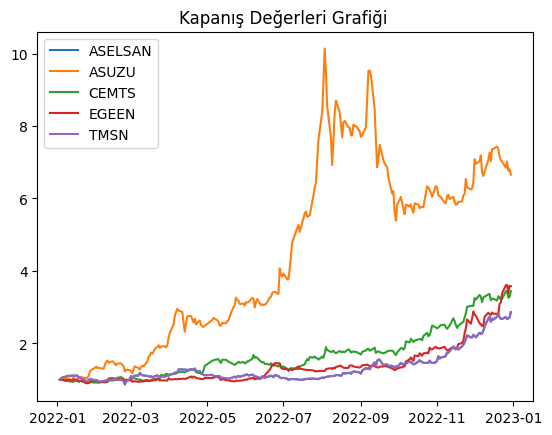

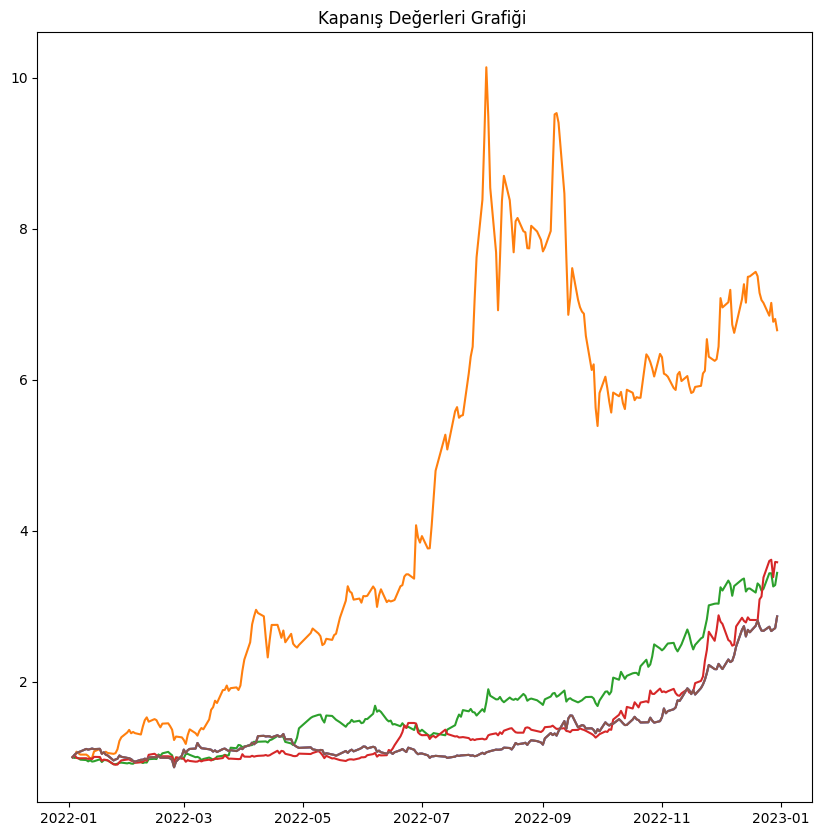

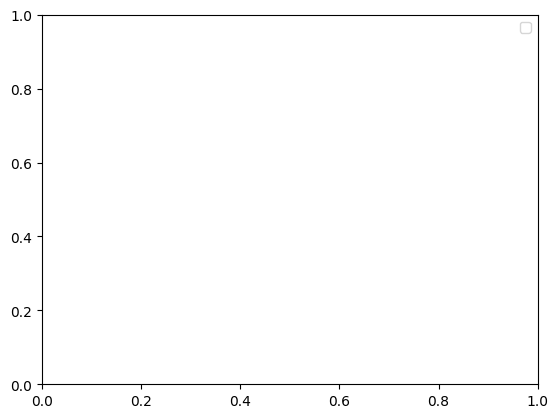

In [ ]:
# ASUZU ve ASELSAN verilerinin "Open" sütununu al ve aynı grafikte çizdir
plt.plot(aselsan_veri['Normalizasyon'], label='ASELSAN')
plt.plot(asuzu_veri['Normalizasyon'], label='ASUZU')
plt.plot(cemts_veri["Normalizasyon"], label="CEMTS")
plt.plot(egeen_veri["Normalizasyon"], label="EGEEN")
plt.plot(tmsn_veri["Normalizasyon"], label="TMSN")
plt.title("Kapanış Değerleri Grafiği ")
plt.legend()  # Etkiketleri görüntüle
plt.show()

plt.figure(figsize=(10, 10))  # Yeni figür oluştur ve boyutlarını ayarla

plt.plot(aselsan_veri['Normalizasyon'], label='ASELSAN')
plt.plot(asuzu_veri['Normalizasyon'], label='ASUZU')
plt.plot(cemts_veri["Normalizasyon"], label="CEMTS")
plt.plot(egeen_veri["Normalizasyon"], label="EGEEN")
plt.plot(tmsn_veri["Normalizasyon"], label="TMSN")
plt.title("Kapanış Değerleri Grafiği ")
tmns = plt.plot(tmsn_veri["Normalizasyon"], label="TMSN")
plt.show(tmns)
plt.legend()  # Etiketleri görüntüle
plt.show()
